In [1]:
import warnings
warnings.filterwarnings('ignore')

## K nearest Neighbour From Scratch 
The data used in this notebook has the following description :

**Title : Diamonds**

1. the 7th column "price" is the values to be predicted.

2. Data Type : Mixed ( Numerical + Categorical)
	
3. Dataset has nearly 54000 instances.

4. It has 10 features.

5. Features 

	price : price in US dollars (\$326-\$18,823)

	carat : weight of the diamond (0.2-5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)
    

6. Caution : Handle Categorical data before building a model. 




In [60]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# import the data
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# make a split of numerical and categorical columns
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns

In [10]:
numerical, categorical

(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'],
 Index(['cut', 'color', 'clarity'], dtype='object'))

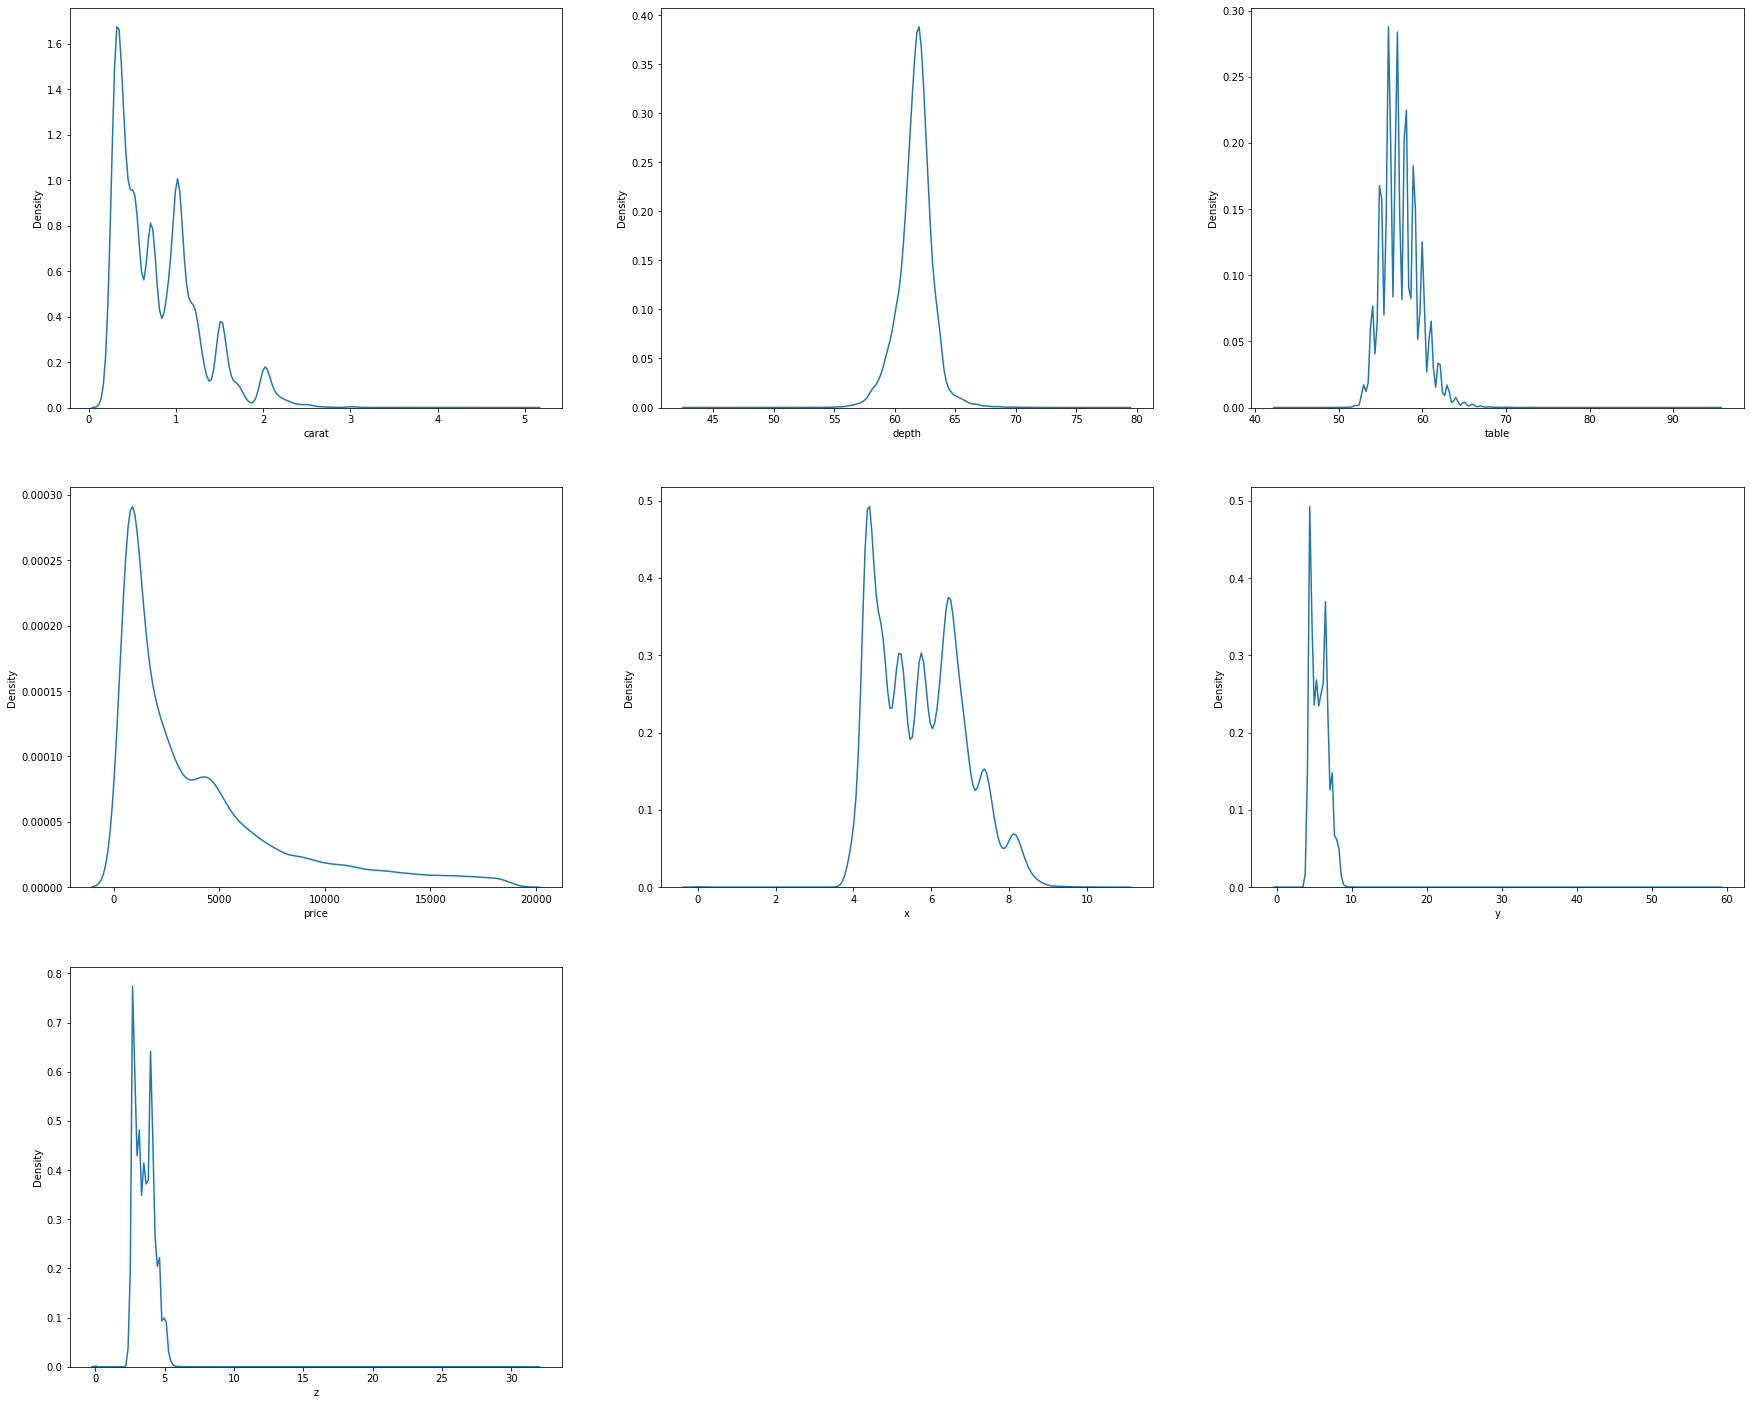

In [11]:
# plot the distplot for numerical columns
plt.figure(figsize = (30, 25))

for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], hist = False)

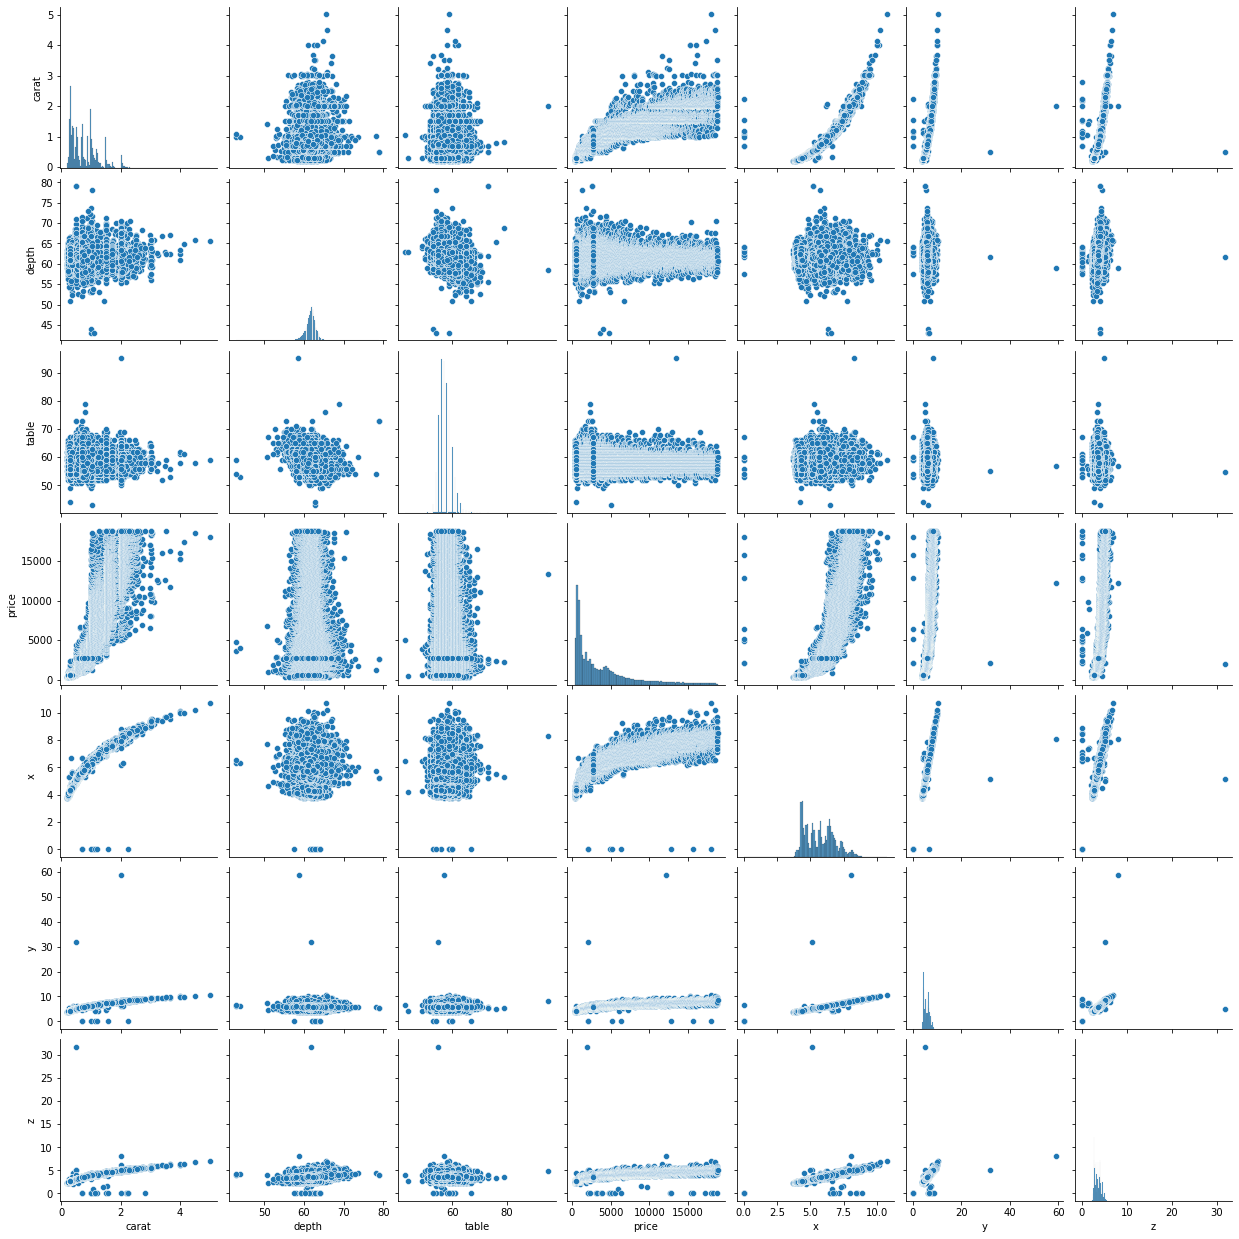

In [12]:
# pairplot
sns.pairplot(df)

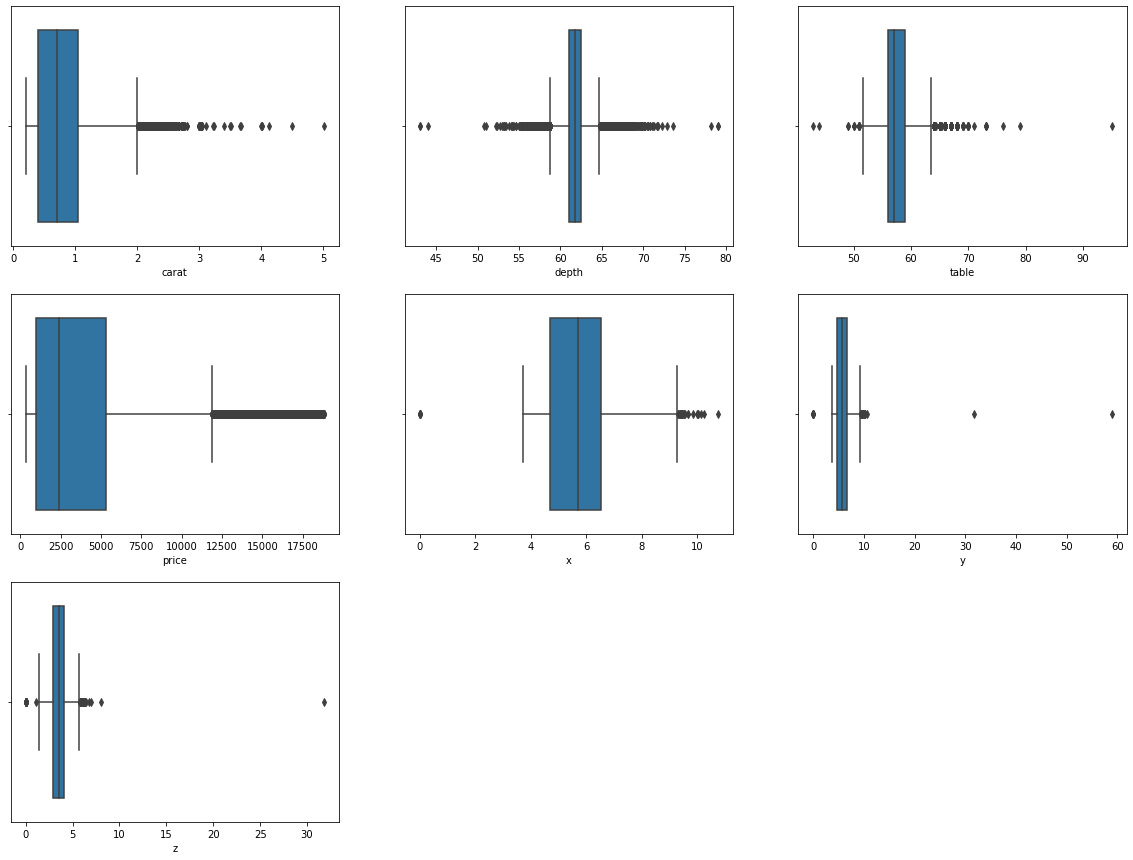

In [13]:
# plot the boxplot
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])

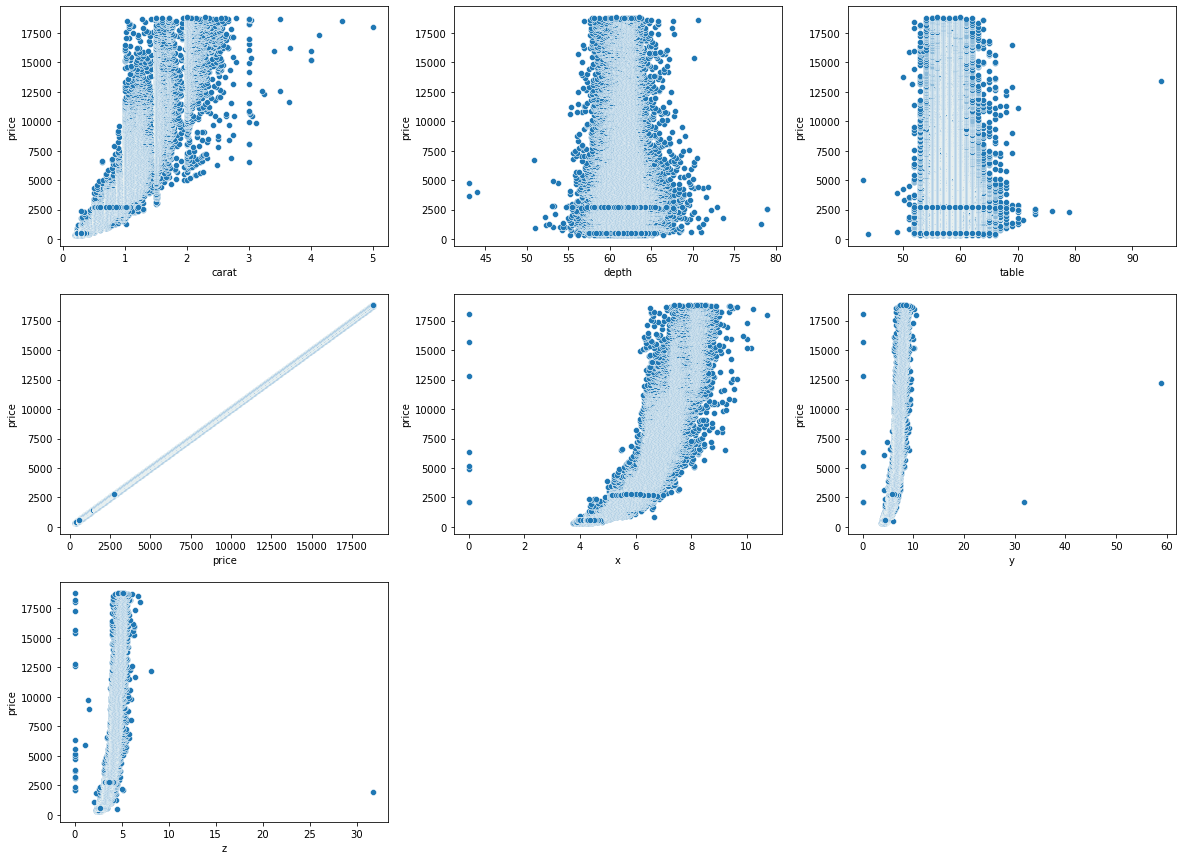

In [14]:
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(y = df['price'], x = df[col])

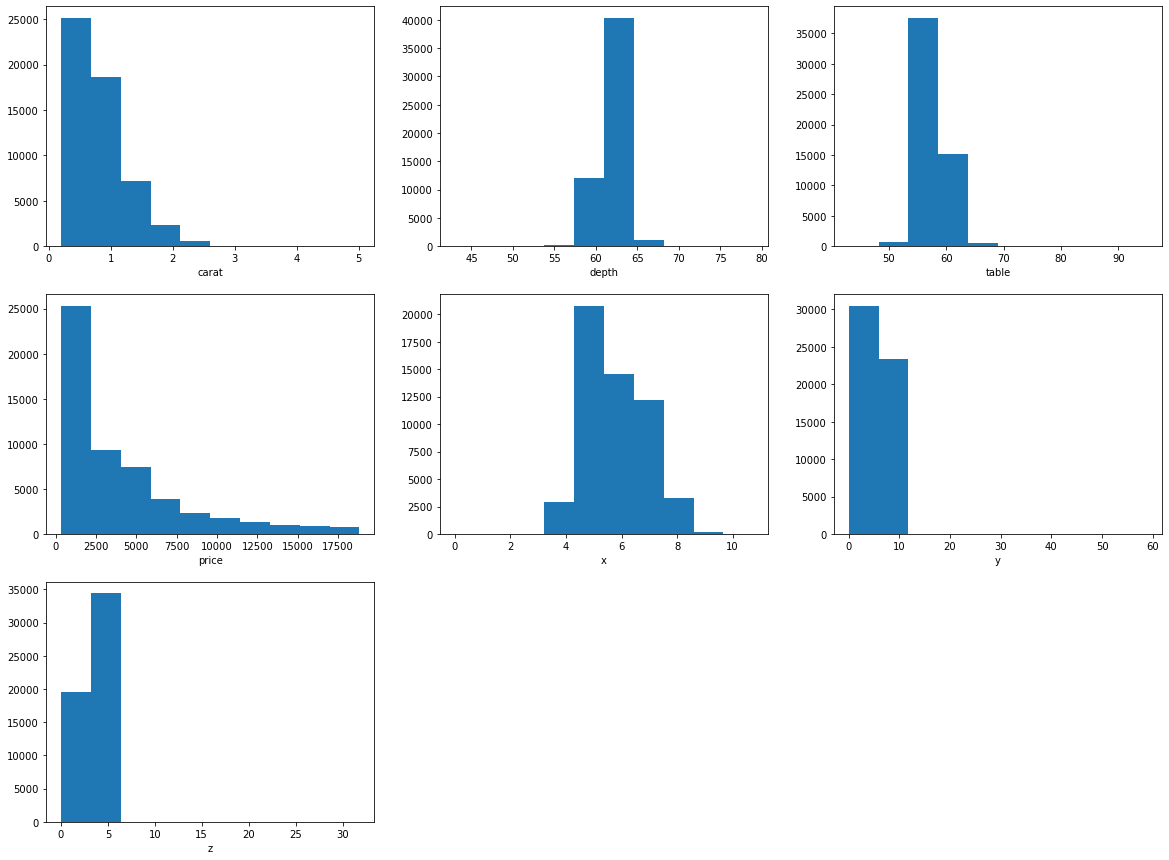

In [15]:
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col])
    plt.xlabel(col)

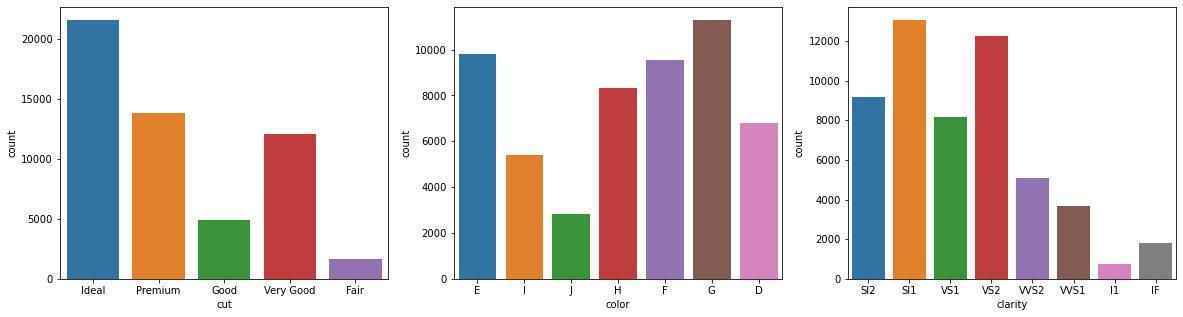

In [16]:
plt.figure(figsize = (20, 5))

for i , col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.countplot(df[col])

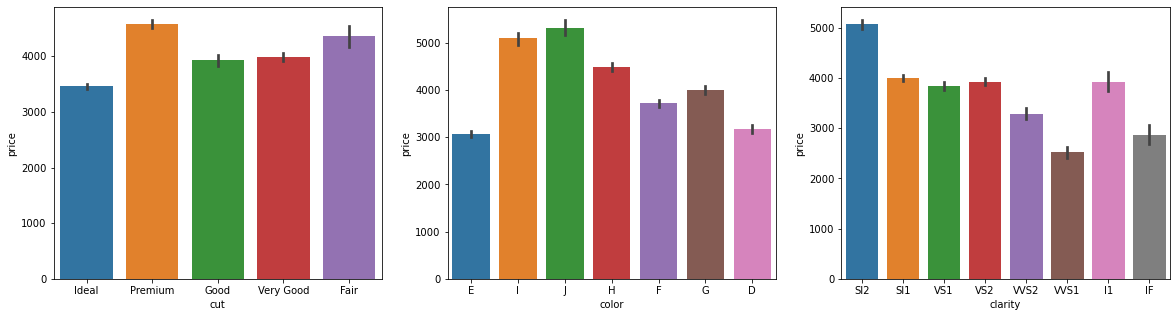

In [17]:
plt.figure(figsize = (20, 5))

for i , col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.barplot(y = df['price'], x = df[col])

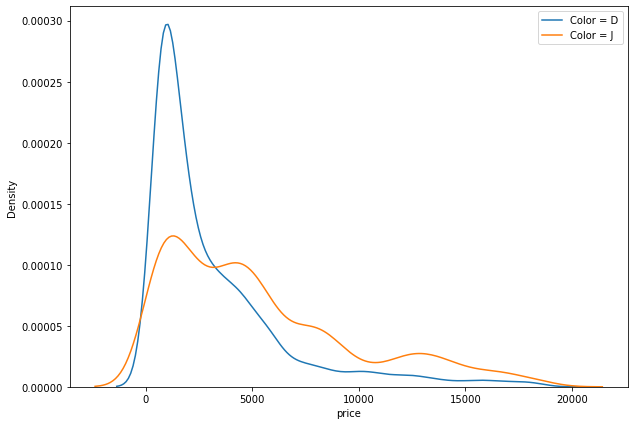

In [18]:
plt.figure(figsize = (10, 7))
sns.distplot(df[df['color']== 'D']['price'], kde = True, hist = False, label = "Color = D")
sns.distplot(df[df['color']== 'J']['price'], kde = True, hist = False, label = "Color = J")
plt.legend();

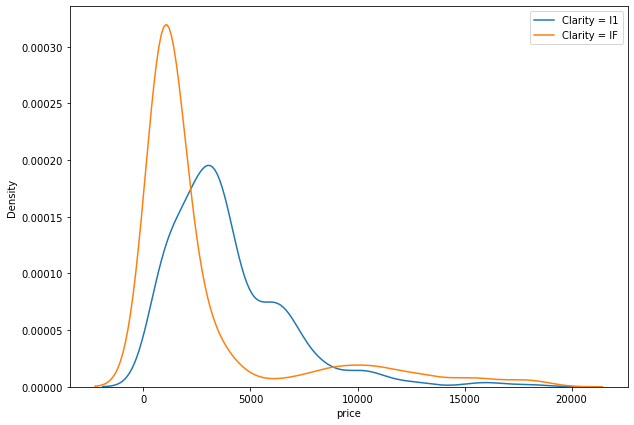

In [19]:
plt.figure(figsize = (10, 7))
sns.distplot(df[df['clarity']== 'I1']['price'], kde = True, hist = False, label = "Clarity = I1")
sns.distplot(df[df['clarity']== 'IF']['price'], kde = True, hist = False, label = "Clarity = IF")
plt.legend();

<AxesSubplot:>

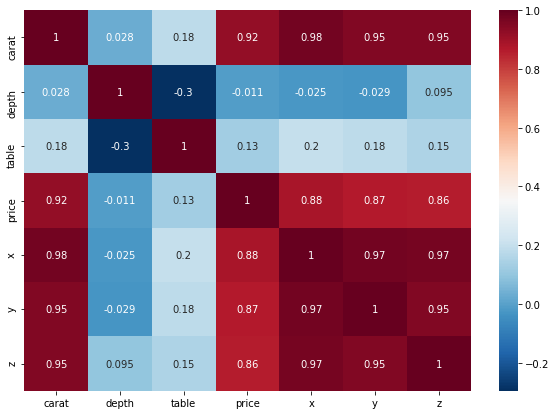

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

In [21]:
# make X and y variables
X = df.drop('price', axis = 1)
y = df['price']
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [22]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [23]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40455, 9), (40455,), (13485, 9), (13485,))

In [25]:
# making the caterogical and numerical column seperately
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,cut,color,clarity
35965,Good,E,VVS2
52281,Ideal,J,SI1
6957,Premium,J,VS2
9163,Ideal,F,SI2
50598,Ideal,F,VS1


In [26]:
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
35965,0.25,64.9,58.0,3.95,3.97,2.57
52281,0.84,61.8,56.0,6.04,6.07,3.74
6957,1.05,61.1,58.0,6.56,6.51,3.99
9163,1.02,60.7,56.0,6.53,6.50,3.95
50598,0.61,61.8,57.0,5.43,5.47,3.37


In [27]:
# as for categorical columns the data is comparitive so the columns are ordinal,  so we can use label encoding
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
35965
52281
6957
9163
50598


In [28]:
X_train_cat.cut.unique()

array(['Good', 'Ideal', 'Premium', 'Fair', 'Very Good'], dtype=object)

In [29]:
cut_le = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_le[x])

X_train_cat_le.head()

,cut
35965,2
52281,4
6957,5
9163,4
50598,4


In [30]:
X_train_cat.color.unique()

array(['E', 'J', 'F', 'G', 'D', 'H', 'I'], dtype=object)

In [31]:
color_le = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_le[x])

X_train_cat_le.head()

,cut,color
35965,2,6
52281,4,1
6957,5,1
9163,4,5
50598,4,5


In [32]:
X_train_cat.clarity.unique()

array(['VVS2', 'SI1', 'VS2', 'SI2', 'VS1', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [33]:
clarity_le = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_le[x])

X_train_cat_le.head()

,cut,color,clarity
35965,2,6,6
52281,4,1,3
6957,5,1,4
9163,4,5,2
50598,4,5,5


In [34]:
# numerical column trasformation
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
35965,-1.156665,2.207837,0.242414,-1.589985,-1.544446,-1.365816
52281,0.086917,0.038517,-0.654923,0.273560,0.291506,0.282149
6957,0.529547,-0.451329,0.242414,0.737217,0.676181,0.634279
9163,0.466314,-0.731242,-0.654923,0.710468,0.667439,0.577938
50598,-0.397869,0.038517,-0.206254,-0.270345,-0.233052,-0.239002


In [35]:
# concatinate the dataframes
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
# X_train_transformed = X_train_transformed.reset_index(drop = True)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
35965,-1.156665,2.207837,0.242414,-1.589985,-1.544446,-1.365816,2,6,6
52281,0.086917,0.038517,-0.654923,0.273560,0.291506,0.282149,4,1,3
6957,0.529547,-0.451329,0.242414,0.737217,0.676181,0.634279,5,1,4
9163,0.466314,-0.731242,-0.654923,0.710468,0.667439,0.577938,4,5,2
50598,-0.397869,0.038517,-0.206254,-0.270345,-0.233052,-0.239002,4,5,5


In [36]:
# preparing the test data in same way:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [37]:
# num columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns,
                                      index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
1388,-1.177742,0.248451,-0.654923,-1.572152,-1.518219,-1.506668
50052,-0.461102,-1.221088,-0.206254,-0.261429,-0.276765,-0.393939
41645,-0.840500,0.248451,-1.103591,-0.867750,-0.871264,-0.830579
42377,-0.777267,-0.661264,-0.206254,-0.725086,-0.740125,-0.788324
17244,1.583430,0.388407,-1.103591,1.521868,1.428047,1.507560


In [38]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
1388
50052
41645
42377
17244


In [39]:
# numerica
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_le[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_le[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_le[x])
X_test_cat_le.head()

,cut,color,clarity
1388,4,4,7
50052,3,5,6
41645,4,6,6
42377,5,6,6
17244,4,6,2


In [40]:
# concatenate
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
# X_test_transformed = X_test_transformed.reset_index(drop = True)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
1388,-1.177742,0.248451,-0.654923,-1.572152,-1.518219,-1.506668,4,4,7
50052,-0.461102,-1.221088,-0.206254,-0.261429,-0.276765,-0.393939,3,5,6
41645,-0.840500,0.248451,-1.103591,-0.867750,-0.871264,-0.830579,4,6,6
42377,-0.777267,-0.661264,-0.206254,-0.725086,-0.740125,-0.788324,5,6,6
17244,1.583430,0.388407,-1.103591,1.521868,1.428047,1.507560,4,6,2


In [41]:
X_test_transformed.iloc[[1]]

,carat,depth,table,x,y,z,cut,color,clarity
50052,-0.461102,-1.221088,-0.206254,-0.261429,-0.276765,-0.393939,3,5,6


In [42]:
X_test_transformed.shape, y_test.shape, X_train_transformed.shape, y_train.shape

((13485, 9), (13485,), (40455, 9), (40455,))

In [43]:
X_train_transformed=np.array(X_train_transformed)
type(X_train_transformed)

numpy.ndarray

In [44]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

In [45]:
X_test_transformed=np.array(X_test_transformed)
type(X_test_transformed)

numpy.ndarray

In [46]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

In [47]:
%%time
# use the KNN algorithm from scratch
distance=np.zeros(y_test.shape)
y_test_pred=np.zeros(y_test.shape)
k=5
for i in range(len(X_test)):
#     calculate the euliciean distance
    distance=np.sqrt(((X_test_transformed[i]-X_train_transformed)**2).sum(axis=1))
#     sort the values upto k 
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
#     make a interpolated values from the y_train of the dataset and take as y_test_pred
    y_test_pred[i]=y_train[sort_value].mean()
print(y_test_pred)

[ 586.4 2427.6 1083.4 ... 8944.4 4548.8 4121.4]
Wall time: 1min 21s


In [48]:
y_test.shape, y_test_pred.shape

((13485,), (13485,))

In [49]:
# make a data frame for the comparison
df_comp = pd.DataFrame(list(zip(y_test, y_test_pred )), columns = ['y_test', 'y_test_pred'])

In [50]:
df_comp

,y_test,y_test_pred
0,559,586.4
1,2201,2427.6
2,1238,1083.4
3,1304,1196.2
4,6901,9642.2
...,...,...
13480,957,1286.0
13481,13187,12667.2
13482,9215,8944.4
13483,4416,4548.8


In [51]:
np.sqrt(np.mean((y_test - y_test_pred)**2))

722.6443196499125

In [52]:
def RMSE(y_test, y_test_pred):
    RMSE = np.sqrt(np.mean((y_test - y_test_pred)**2))
    return RMSE

In [53]:
# comparing with the sklearn KNN model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train_transformed, y_train)
pred = model.predict(X_test_transformed)

In [54]:
df_comp_sklearn = pd.DataFrame(list(zip(y_test, pred )), columns = ['y_test', 'pred'])

In [55]:
df_comp_sklearn

,y_test,pred
0,559,586.4
1,2201,2427.6
2,1238,1083.4
3,1304,1196.2
4,6901,9642.2
...,...,...
13480,957,1286.0
13481,13187,12667.2
13482,9215,8944.4
13483,4416,4548.8


In [56]:
rmse_KNN_scratch = RMSE(y_test, y_test_pred)
rmse_KNN_sklearn = RMSE(y_test, pred)

In [57]:
from sklearn import metrics
scratch_acc=metrics.r2_score(y_test,y_test_pred)
sklearn_acc = metrics.r2_score(y_test,pred)

In [58]:
rmse_KNN_scratch, rmse_KNN_sklearn

(722.6443196499125, 722.6432072942868)

In [59]:
scratch_acc, sklearn_acc

(0.9667584305452344, 0.96675853288166)